<h1>Note:</h1>
Some commented parts are required only if we run it on drive but make sure the datasets are on same dir
    

In [0]:
#import libraries
#!pip3 install keras==2.1.3
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import time
plt.style.use('seaborn-whitegrid')



    100% |████████████████████████████████| 327kB 21.9MB/s 
textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.3 which is incompatible.
  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


Using TensorFlow backend.


2.1.3


In [0]:
"""
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
"""

    100% |████████████████████████████████| 993kB 18.4MB/s 


In [0]:
"""
train_link = 'https://drive.google.com/open?id=104DhX-7q-6gVxM6I7EB8C5XTF0YQ5njr'
fluff, id = train_link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv') 

test_link = 'https://drive.google.com/open?id=1zZTF2b6p8aJoAaPGSrvd04Y5f-AP1VPD'
fluff, id = test_link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test.csv')
"""

In [0]:

def current_example(example_number, data_set):
    current_datafile = open(data_set + '.csv', 'r')
    current_dataset = current_datafile.readlines()
    current_datafile.close()
    
    inputs = np.zeros((len(example_number), 32, 32, 1))
    targets = np.zeros((len(example_number), 1))
    index = 0
    
    for each_number in example_number:
        each_set = current_dataset[each_number]
        all_values = each_set.split(',')

        #the first value is the label
        correct_label = int(all_values[0])

        #Normalize the pixel values in range of 0.01 - 1 
        inputs[index] = np.asarray(all_values[1:], dtype = np.float32).reshape(32, 32, 1) / 255  
        targets[index] = int(all_values[0])
        index += 1
            
    return(inputs, targets)


In [0]:
#prepare training and test data
#num_exmp = np.random.randint(0, 78200, 78200, dtype = np.int32)
num_exmp = np.linspace(0, 78199, 78200, dtype = np.int32)
np.random.shuffle(num_exmp)
(x_train, y_train) = current_example(num_exmp, 'train') 
y_train = keras.utils.to_categorical(y_train, num_classes=46)

num_exmp = np.linspace(0, 13799, 13800, dtype = np.int32)
x_test, y_test = current_example(num_exmp, 'test')
y_test = keras.utils.to_categorical(y_test, num_classes=46)



In [0]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 1), data_format = 'channels_last'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)    

In [0]:
#Compile the model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#use sgd if accuracy doesnt improves, last time sgd worked great 0.9907 on 30 epoch
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [0]:
#Evaluate the model, 
time1 = time.time()
tensorboard_callback = keras.callbacks.TensorBoard(log_dir = './cnn0', histogram_freq = 0, write_graph = True, write_images = True)
history = model.fit(x_train, y_train, batch_size=100, epochs = 100, validation_split = 0.3, shuffle = True, callbacks = [tensorboard_callback])
time2 = time.time()
score = model.evaluate(x_test, y_test, batch_size=32, verbose = 1)
time3 = time.time()
print("Train time = ", (time2 - time1)/60, "min", "\nTest time = ", (time3 - time2)/ 60, "min", "\n Test loss: ", score[0], " Test accuracy: ", score[1])

Instructions for updating:
Use tf.cast instead.
Train on 54740 samples, validate on 23460 samples
Epoch 1/100
54740/54740 [==============================] - 17s 319us/step - loss: 1.2116 - acc: 0.6613 - val_loss: 0.2492 - val_acc: 0.9282
Epoch 2/100
54740/54740 [==============================] - 13s 230us/step - loss: 0.3650 - acc: 0.8885 - val_loss: 0.1257 - val_acc: 0.9611
Epoch 3/100
54740/54740 [==============================] - 13s 231us/step - loss: 0.2455 - acc: 0.9243 - val_loss: 0.1000 - val_acc: 0.9685
Epoch 4/100
54740/54740 [==============================] - 13s 232us/step - loss: 0.1914 - acc: 0.9404 - val_loss: 0.0737 - val_acc: 0.9767
Epoch 5/100
54740/54740 [==============================] - 13s 231us/step - loss: 0.1585 - acc: 0.9493 - val_loss: 0.0706 - val_acc: 0.9775
Epoch 6/100
54740/54740 [==============================] - 13s 231us/step - loss: 0.1371 - acc: 0.9549 - val_loss: 0.0651 - val_acc: 0.9795
Epoch 7/100
54740/54740 [==============================] - 12s

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


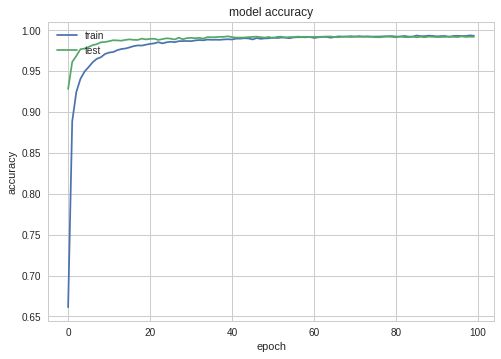

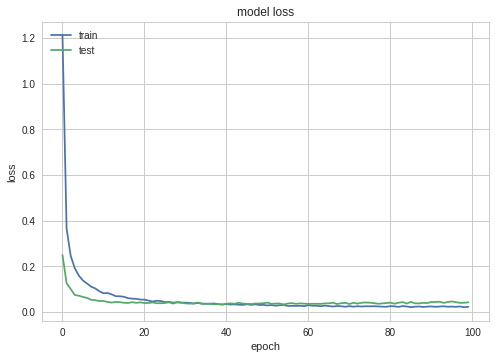

In [0]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#model.save('mycnn.hdf5')
model_json = model.to_json()

with open("cnn0.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("cnn0.h5")